We are going to be implementing the most common classification algorithm called the logisitic regression. 

A logistic regression classifier is a supervised learning algorithm used to solve binary classification problems. It works by taking input features, applying a linear combination of them using learned weights, and then passing the result through a sigmoid function to produce a probability between 0 and 1. This probability represents the likelihood that the input belongs to the positive class. If the probability is above a certain threshold, typically 0.5, the input is classified as one class (usually "1"); otherwise, it's classified as the other class ("0"). Despite the name, logistic regression is fundamentally a classification model, not a regression one. It's widely used for tasks like spam detection, disease diagnosis, or predicting binary outcomes.

We are going to use only numpy and matplotlib in this exercice. Also Scikit-learn will be use as it is helpful to generate datas for our training and testing.

Notations 
n →number of features
m →number of training examples
X →input data matrix of shape (m x n)
y →true/ target value (can be 0 or 1 only)
x(i), y(i)→ith training example
w → weights (parameters) of shape (n x 1)
b →bias (parameter), a real number that can be broadcasted.
y_hat(y with a cap/hat)→ hypothesis (outputs values between 0 and 1)

In [ ]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

#we generate our training data
X, y = make_classification(n_features=2, n_redundant=0, 
                           n_informative=2, random_state=1, 
                           n_clusters_per_class=1)

In [ ]:
#we define the activation function that is going to be used
def sigmoid(z):
    return 1.0/(1 + np.exp(-z))

In [ ]:
#we define the loss which is the Binary Coss-Entropy Loss
def loss(y, y_hat):
    loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
    return loss

In [ ]:
# we define and compute the gradient
def gradients(X, y, y_hat):

    # X --> Input.
    # y --> true/target value.
    # y_hat --> hypothesis/predictions.
    # w --> weights (parameter).
    # b --> bias (parameter).

    # m-> number of training examples.
    m = X.shape[0]

    # Gradient of loss w.r.t weights.
    dw = (1/m)*np.dot(X.T, (y_hat - y))

    # Gradient of loss w.r.t bias.
    db = (1/m)*np.sum((y_hat - y)) 

    return dw, db

In [7]:
def plot_decision_boundary(X, w, b):

    # X --> Inputs
    # w --> weights
    # b --> bias

    # The Line is y=mx+c
    # So, Equate mx+c = w.X + b
    # Solving we find m and c
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -w[0]/w[1]
    c = -b/w[1]
    x2 = m*x1 + c

    # Plotting
    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "g^")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    plt.xlim([-2, 2])
    plt.ylim([0, 2.2])
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title('Decision Boundary')
    plt.plot(x1, x2, 'y-')

In [ ]:
#usual data normalization
def normalize(X):

    # X --> Input.

    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape

    # Normalizing all the n features of X.
    for i in range(n):
        X = (X - X.mean(axis=0))/X.std(axis=0)

    return X

In [ ]:
#we define the training loop
def train(X, y, bs, epochs, lr):

    # X --> Input.
    # y --> true/target value.
    # bs --> Batch Size.
    # epochs --> Number of iterations.
    # lr --> Learning rate.

    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape

    # Initializing weights and bias to zeros.
    w = np.zeros((n,1))
    b = 0

    # Reshaping y.
    y = y.reshape(m,1)

    # Normalizing the inputs.
    x = normalize(X)

    # Empty list to store losses.
    losses = []

    # Training loop.
    for epoch in range(epochs):
        for i in range((m-1)//bs + 1):

            # Defining batches. SGD.
            start_i = i*bs
            end_i = start_i + bs
            xb = X[start_i:end_i]
            yb = y[start_i:end_i]

            # Calculating hypothesis/prediction.
            y_hat = sigmoid(np.dot(xb, w) + b)

            # Getting the gradients of loss w.r.t parameters.
            dw, db = gradients(xb, yb, y_hat)

            # Updating the parameters.
            w -= lr*dw
            b -= lr*db

        # Calculating loss and appending it in the list.
        l = loss(y, sigmoid(np.dot(X, w) + b))
        losses.append(l)

    # returning weights, bias and losses(List).
    return w, b, losses

In [ ]:
#we define the predicting function
def predict(X,w=w,b=b):

    # X --> Input.

    # Normalizing the inputs.
    x = normalize(X)

    # Calculating presictions/y_hat.
    preds = sigmoid(np.dot(X, w) + b)

    # Empty List to store predictions.
    pred_class = []
    # if y_hat >= 0.5 --> round up to 1
    # if y_hat < 0.5 --> round up to 1
    pred_class = [1 if i > 0.5 else 0 for i in preds]

    return np.array(pred_class)

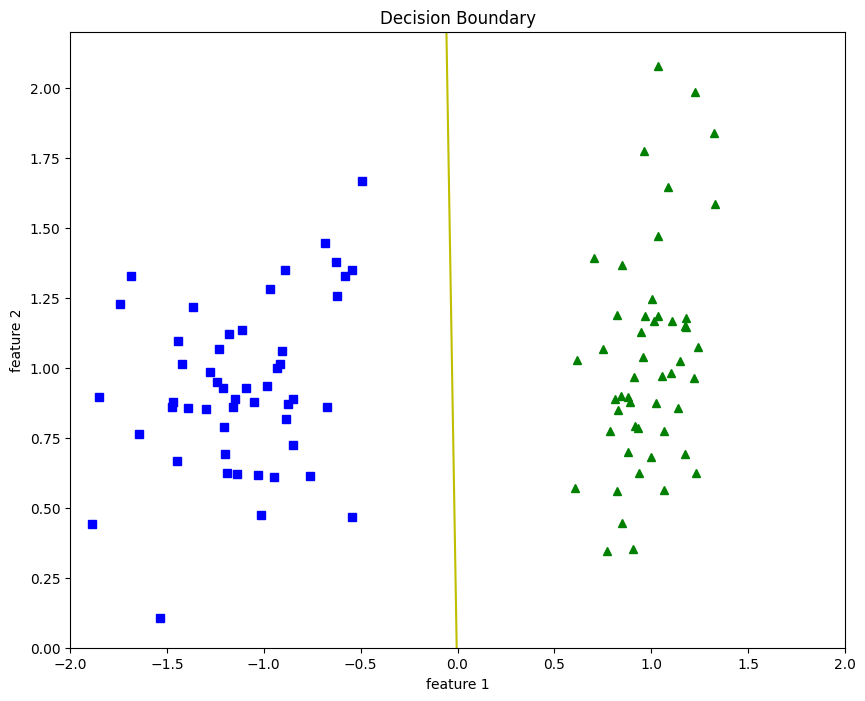

In [16]:
# Training 
w, b, l = train(X, y, bs=100, epochs=1000, lr=0.01)
# Plotting Decision Boundary
plot_decision_boundary(X, w, b)

In [ ]:
#we have to define a metric to evaluate our model
def accuracy(y, y_hat):
    accuracy = np.sum(y == y_hat) / len(y)
    return accuracy

In [25]:

accuracy(y, predict(X))

np.float64(1.0)

In [ ]:
# now we are going to be testing the model with Non-linearly Separable Data
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.24)

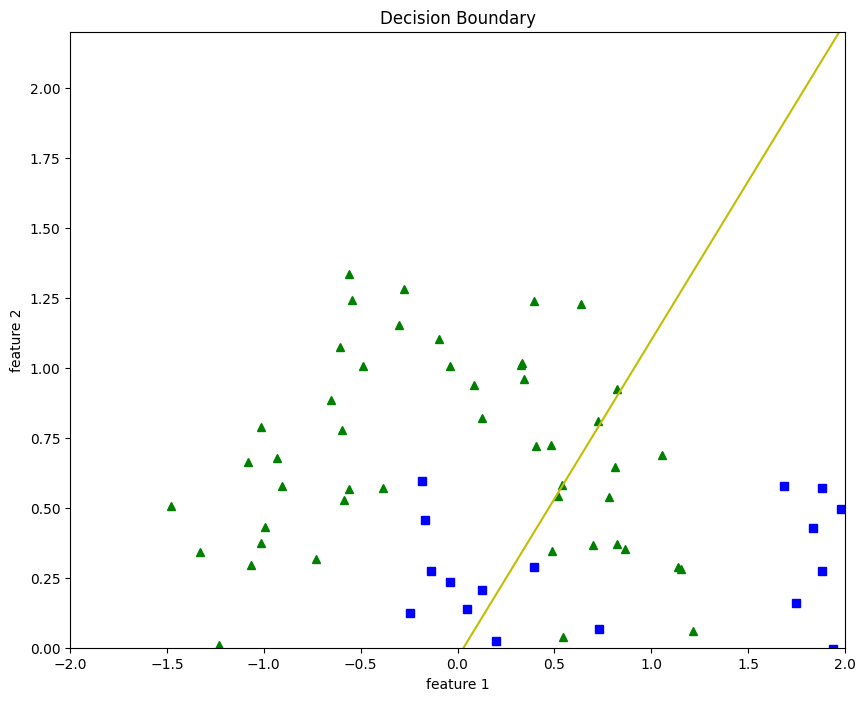

In [36]:
# Training 
w, b, l = train(X, y, bs=100, epochs=1000, lr=0.001)
# Plotting Decision Boundary
plot_decision_boundary(X, w, b)

In [37]:
accuracy(y, predict(X))

np.float64(0.32)

The prediction is not really good. Only 0.32 of accuracy. This shows how poorly this model is performing with non linearly seperable data with outliers.


**CONCLUSION**

The implementation of logistic regression from scratch served as an effective demonstration of core machine learning fundamentals, particularly in the context of classification problems. By manually coding the entire pipeline including data generation, normalization, the sigmoid activation, gradient descent optimization, and evaluation, we were able to showcase a clear understanding of how logistic regression works at a low level, without relying on external ML libraries like scikit-learn.

This implementation is highly pertinent to the goals of this demo, as it not only reinforces the foundational concepts behind classification tasks but also demonstrates practical coding ability, mathematical intuition, and model evaluation.

Advantages of logistic regression include its simplicity, interpretability, and efficiency on linearly separable data. It’s particularly strong when dealing with binary outcomes and when the relationship between input features and the output is roughly linear in the log-odds space.

However, there are also limitations. Logistic regression struggles with complex or highly nonlinear decision boundaries, is sensitive to outliers, and may require feature engineering or regularization to avoid overfitting. Additionally, in real-world datasets where class overlap or imbalance exists, its performance can be suboptimal compared to more advanced classifiers.

Despite these limitations, presenting logistic regression in this context was highly appropriate. It illustrates not only competence with core ML tools but also the ability to reason about model behavior, evaluate trade-offs, and build end-to-end solutions from the ground up—all of which are essential in applied machine learning roles.